# Tayara EDA & Dashboard-ready Notebook

Loads the cleaned (full) dataset and provides key insights, plots,
plus dashboard-ready summary tables for use in reporting or apps.

- Use in Jupyter OR export cells to Streamlit/PowerBI/Tableau/Plotly Dash


## 1. Load Data & Setup

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('tayara_real_estate_cleaned_offer_by_text_and_price.csv')
print(df.shape)
df.head()

(9054, 12)


,page,title,price,price_amount,price_currency,location,surface_m2,rooms,property_type,offer_type,listing_date,url
0,1,Studio Luxe à louer,270 DT,270.0,DT,Ariana,NaN,NaN,studio,rent,2 minutes ago,https://www.tayara.tn/item/appartements/ariana...
1,1,📍ENNASR 2 : APPARTEMENT S+3 A LOUER,1450 DT,1450.0,DT,Ariana,NaN,3.0,appartement,rent,2 minutes ago,https://www.tayara.tn/item/appartements/ariana...
2,1,A louer s1 meublé manar1,800 DT,800.0,DT,Tunis,NaN,NaN,NaN,rent,3 minutes ago,https://www.tayara.tn/item/appartements/tunis/...
3,1,📍 NOUVELLE ARIANA : BUREAU H+3 SPACIEUX À LOUER,1400 DT,1400.0,DT,Ariana,NaN,NaN,bureau,rent,3 minutes ago,https://www.tayara.tn/item/bureaux-et-plateaux...
4,1,ENNASR 1 : APPARTEMENT S+3 RICHEMENT MEUBLÉ OU...,1400 DT,1400.0,DT,Ariana,NaN,3.0,appartement,rent,3 minutes ago,https://www.tayara.tn/item/appartements/ariana...


## 2. Missing Values & Data Distribution


In [10]:
na_summary = df.isna().mean().sort_values(ascending=False).to_frame('MissingRatio')
display(na_summary)
df.describe()

,MissingRatio
surface_m2,0.877181
rooms,0.674398
property_type,0.331456
price,0.096090
price_amount,0.096090
price_currency,0.096090
page,0.000000
title,0.000000
location,0.000000
offer_type,0.000000


,page,price_amount,surface_m2,rooms
count,9054.000000,8.184000e+03,1112.000000,2948.000000
mean,158.743318,2.402622e+06,835.470324,2.155360
std,91.464688,5.261903e+07,1336.497328,1.049641
min,1.000000,2.000000e+00,0.000000,0.000000
25%,79.000000,9.000000e+02,150.000000,1.000000
50%,159.000000,2.400000e+03,350.000000,2.000000
75%,238.000000,2.250000e+05,800.000000,3.000000
max,317.000000,2.200000e+09,9000.000000,9.000000


## 3. Price Distribution by Location


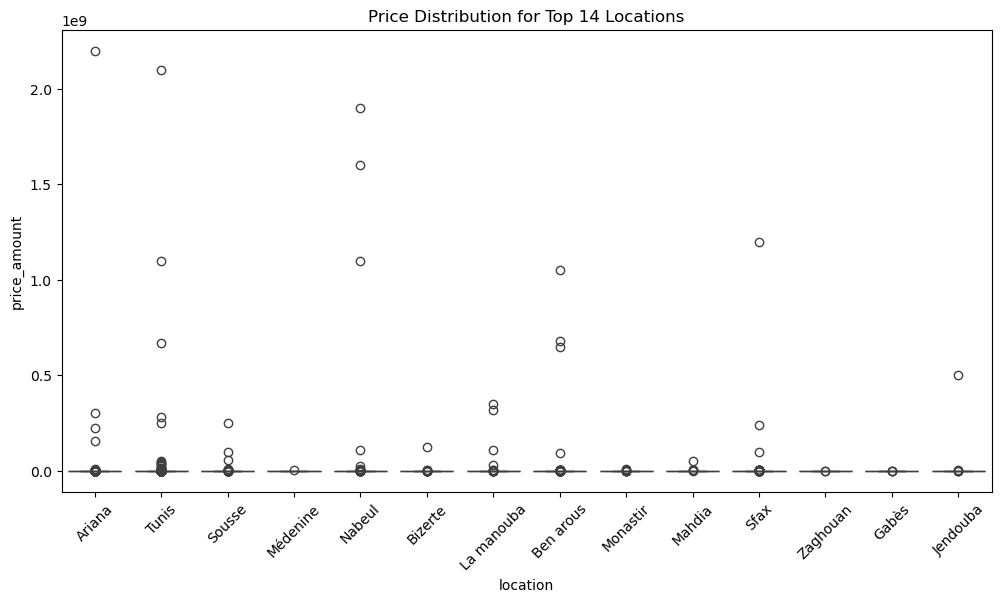

In [11]:
plt.figure(figsize=(12,6))
toplocs = df['location'].value_counts().head(14).index
sns.boxplot(x='location', y='price_amount', data=df[df['location'].isin(toplocs)])
plt.xticks(rotation=45)
plt.title('Price Distribution for Top 14 Locations')
plt.show()

## 4. Price per m² (Histogram)


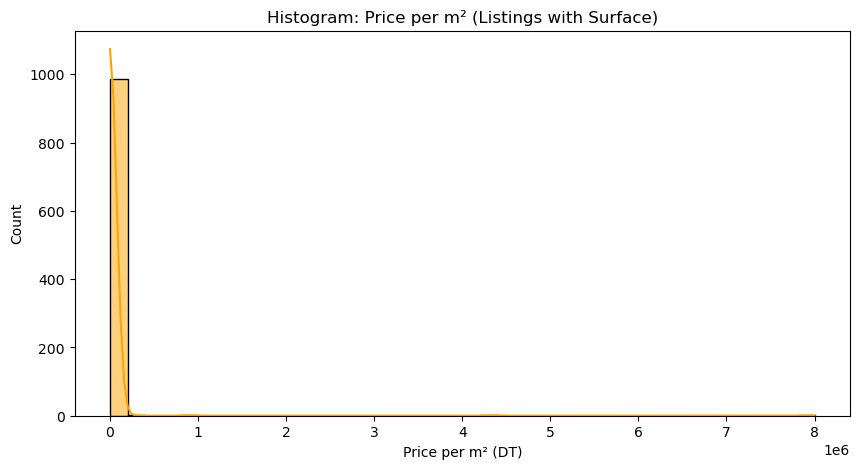

In [12]:
df['price_per_m2'] = df['price_amount'] / df['surface_m2']
plt.figure(figsize=(10,5))
sns.histplot(df['price_per_m2'].dropna(), bins=40, kde=True, color='orange')
plt.title('Histogram: Price per m² (Listings with Surface)')
plt.xlabel('Price per m² (DT)')
plt.show()

## 5. Count by Property Type


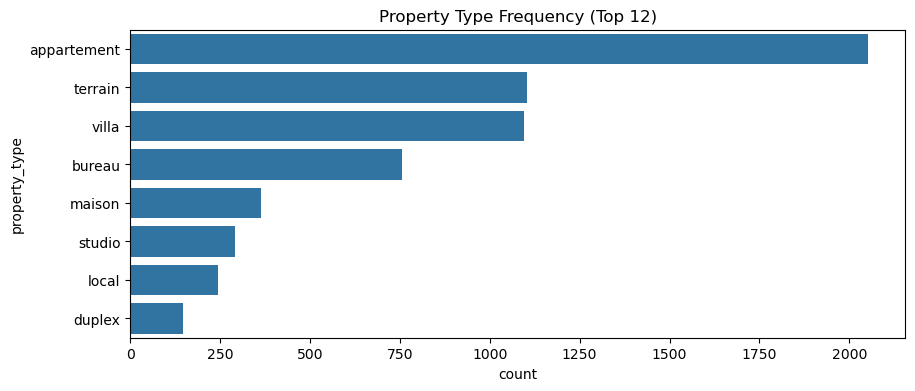

,count
property_type,
appartement,2053
terrain,1103
villa,1094
bureau,756
maison,364
studio,291
local,244
duplex,148


In [13]:
plt.figure(figsize=(10,4))
sns.countplot(y='property_type', data=df, order=df['property_type'].value_counts().head(12).index)
plt.title('Property Type Frequency (Top 12)')
plt.show()
df['property_type'].value_counts().to_frame('count')

## 6. Scatter: Price vs Surface


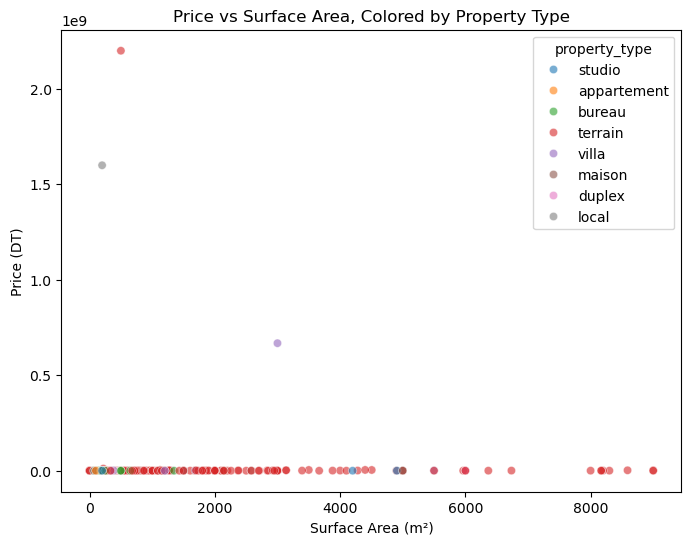

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='surface_m2', y='price_amount', data=df, hue='property_type', alpha=0.6)
plt.title('Price vs Surface Area, Colored by Property Type')
plt.xlabel('Surface Area (m²)')
plt.ylabel('Price (DT)')
plt.show()

## 7. Dashboard Summary Tables


In [15]:
summary = df.groupby('location').agg(
    count=('title','count'),
    mean_price=('price_amount','mean'),
    median_price=('price_amount','median'),
    mean_surface=('surface_m2','mean'),
    type_count=('property_type','nunique')
).sort_values('count', ascending=False).head(12)
display(summary)

summary_by_type = df.groupby('property_type').agg(
    count=('title','count'),
    mean_price=('price_amount','mean'),
    median_price=('price_amount','median'),
    median_surface=('surface_m2','median')
).sort_values('count', ascending=False).head(10)
display(summary_by_type)

,count,mean_price,median_price,mean_surface,type_count
location,,,,,
Tunis,3500,1.549415e+06,2100.0,520.486547,8
Ariana,1521,2.323880e+06,1600.0,808.268293,8
Sousse,1009,6.433413e+05,2000.0,1262.393258,8
Nabeul,904,6.144661e+06,180000.0,926.707865,8
Ben arous,784,3.798848e+06,1800.0,877.313131,8
Sfax,409,4.646872e+06,80000.0,1373.252632,7
Bizerte,216,8.950271e+05,1700.0,1157.068966,8
Monastir,165,2.167134e+05,1150.0,1212.700000,8
La manouba,152,6.158605e+06,1300.0,856.529412,8


,count,mean_price,median_price,median_surface
property_type,,,,
appartement,2053,1.790889e+05,1500.0,109.5
terrain,1103,4.410295e+06,139000.0,528.0
villa,1094,1.008247e+07,163680.0,430.0
bureau,756,1.779819e+04,2100.0,150.0
maison,364,2.206461e+06,155000.0,225.5
studio,291,2.668394e+05,520.0,150.0
local,244,7.876579e+06,2500.0,130.0
duplex,148,2.559092e+05,4300.0,200.0


## 8. Save Dashboard Tables (optional)
- Use these .csv files for PowerBI/Tableau/streamlit dashboards.


In [16]:
summary.to_csv('tayara_summary_by_location.csv')
summary_by_type.to_csv('tayara_summary_by_type.csv')
print("Dashboard summary tables saved.")

Dashboard summary tables saved.
